### Context

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

#### Association Rules

This section will require that you create association rules that will allow you to identify relationships between variables in the dataset. You are provided with a separate dataset that comprises groups of items that will be associated with others. Just like in the other sections, you will also be required to provide insights for your analysis.

In [8]:
# We first we install the required arules library 
#
# install.packages("arules")

# Loading the arules library
#
library(arules)

Installing package into 'C:/Users/lggat/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lggat\AppData\Local\Temp\RtmpeK1bmC\downloaded_packages


Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [11]:
# load data
path <-"http://bit.ly/SupermarketDatasetII"

data<-read.transactions(path, sep = ",")

Warning message in asMethod(object):
"removing duplicated items in transactions"

In [12]:
# Verifying the object's class
# ---
# This should show us transactions as the type of data that we will need
# ---
# 
class(data)

[1] "transactions"
attr(,"package")
[1] "arules"

In [15]:
# Previewing our first 5 transactions
#
inspect(data[1:5])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


In [16]:
# If we wanted to preview the items that make up our dataset,
# alternatively we can do the following
# ---
# 
items<-as.data.frame(itemLabels(data))
colnames(items) <- "Item"
head(items, 10) 

,Item
,<fct>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [17]:
# Generating a summary of the data dataset
# ---
# This would give us some information such as the most purchased items, 
# distribution of the item sets (no. of items purchased in each transaction), etc.
# ---
# 
summary(data)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

<b>We observe that we have 7501 rows and 199 columns with the most frequent items being mineral water and eggs.</b>

In [19]:
# Exploring the frequency of some articles 
# i.e. transactions ranging from 3 to 10 and performing 
# some operation in percentage terms of the total transactions 
# 
itemFrequency(data[, 3:10],type = "absolute")
round(itemFrequency(data[, 3:10],type = "relative")*100,2)

asparagus        avocado    babies food          bacon barbecue sauce 
            36            250             34             65             81 
     black tea    blueberries     body spray 
           107             69             86

asparagus        avocado    babies food          bacon barbecue sauce 
          0.48           3.33           0.45           0.87           1.08 
     black tea    blueberries     body spray 
          1.43           0.92           1.15

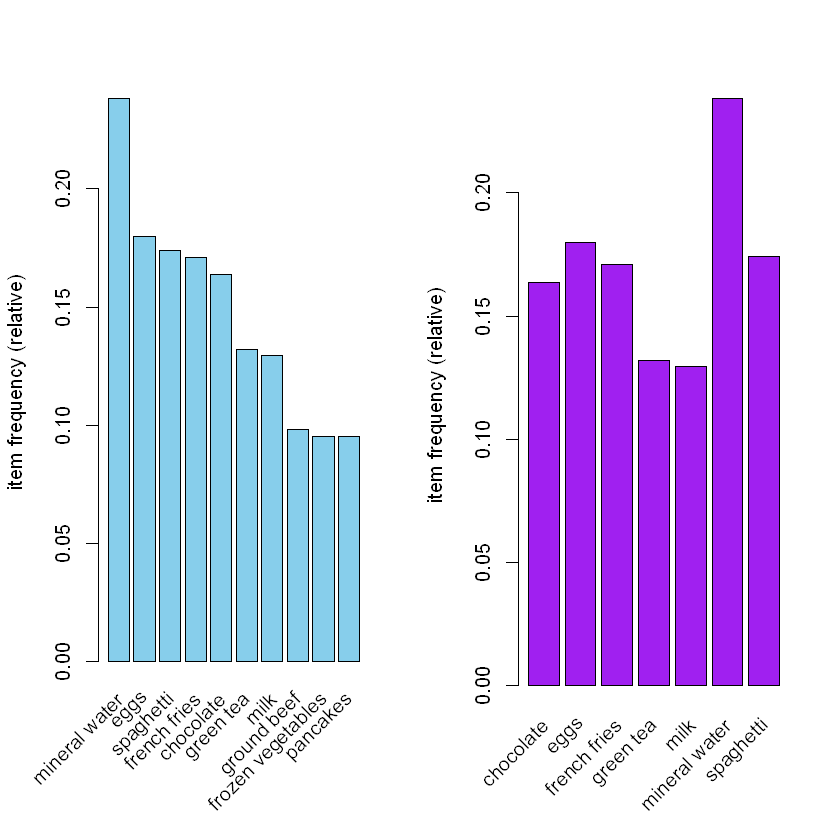

In [22]:
# Producing a chart of frequencies and filtering 
# to consider only items with a minimum percentage 
# of support/ considering a top x of items
# ---
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(data, topN = 10,col="skyblue")
itemFrequencyPlot(data, support = 0.1,col="purple")

In [23]:
# Building a model based on association rules 
# using the apriori function 
# ---
# We use Min Support as 0.001 and confidence as 0.8
# ---
# 
rules <- apriori (data, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [24]:
# We use measures of significance and interest on the rules, 
# determining which ones are interesting and which to discard.
# ---
# However since we built the model using 0.001 Min support 
# and confidence as 0.8 we obtained 74 rules.
# However, in order to illustrate the sensitivity of the model to these two parameters, 
# we will see what happens if we increase the support or lower the confidence level
# 

# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (data,parameter = list(supp = 0.002, conf = 0.8)) 

# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (data, parameter = list(supp = 0.001, conf = 0.6)) 

rules2

rules3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort ve

set of 2 rules 

set of 545 rules 

<b>In our first model, we increased the minimum support of 0.001 to 0.002 and model rules went from 74 to only 2. This would lead us to understand that using a high level of support can make the model lose interesting rules. 
    
 In the second model, we decreased the minimum confidence level to 0.6 and the number of model rules went from 74 to 545. This would mean that using a low confidence level increases the number of rules to quite an extent and many will not be useful.</b>

In [25]:
# We can perform an exploration of our model 
# through the use of the summary function as shown
# ---
# Upon running the code, the function would give us information about the model 
# i.e. the size of rules, depending on the items that contain these rules. 
# In our above case, most rules have 3 and 4 items though some rules do have upto 6. 
# More statistical information such as support, lift and confidence is also provided.
# ---
# 
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence          lift            count       
 Min.   :0.001067   Min.   :0.8000   Min.   : 3.356   Min.   : 8.000  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.: 3.432   1st Qu.: 8.000  
 Median :0.001133   Median :0.8333   Median : 3.795   Median : 8.500  
 Mean   :0.001256   Mean   :0.8504   Mean   : 4.823   Mean   : 9.419  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.: 4.877   3rd Qu.:10.000  
 Max.   :0.002533   Max.   :1.0000   Max.   :12.722   Max.   :19.000  

mining info:
 data ntransactions support confidence
 data          7501   0.001        0.8

In [26]:
# Observing rules built in our model i.e. first 5 model rules
# ---
# 
inspect(rules[1:5])

    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    lift      count
[1]  3.729058  8   
[2]  4.666587 13   
[3]  3.432428  9   
[4]  3.595877 12   
[5] 11.976387 19   


<b>Interpretation of the first rule:</b>

- If someone buys frozen smoothie and spinach, they are 89% likely to buy mineral water too

In [27]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
# We can also use different criteria such as: (by = "lift" or by = "support")
# 
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence lift      count
[1] 1.00       12.606723  8   
[2] 1.00        4.195190  9   
[3] 1.00        7.717078  8   
[4] 1.00        4.195190  9   
[5] 0.95       11.976387 19   


<b>Interpretation</b>

- The given first four rules have a confidence of 100

In [28]:
# If we're interested in making a promotion relating to the sale of mineral water, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing mineral
# ---
# 
mineral_water <- subset(rules, subset = rhs %pin% "mineral water")
 
# Then order by confidence
mineral_water<-sort(mineral_water, by="confidence", decreasing=TRUE)
inspect(mineral_water[1:5])

    lhs                    rhs                 support confidence     lift count
[1] {ground beef,                                                               
     light cream,                                                               
     olive oil}         => {mineral water} 0.001199840  1.0000000 4.195190     9
[2] {cake,                                                                      
     olive oil,                                                                 
     shrimp}            => {mineral water} 0.001199840  1.0000000 4.195190     9
[3] {red wine,                                                                  
     soup}              => {mineral water} 0.001866418  0.9333333 3.915511    14
[4] {ground beef,                                                               
     pancakes,                                                                  
     whole wheat rice}  => {mineral water} 0.001333156  0.9090909 3.813809    10
[5] {frozen vegetables,     

<b>Observation</b>
- The first 5 gives 90% confidence

In [29]:
# What if we wanted to determine items that customers might buy 
# who have previously bought mineral water?
# ---
# 
# Subset the rules
mineral_water <- subset(rules, subset = lhs %pin% "mineral water")

# Order by confidence
mineral_water<-sort(mineral_water, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(mineral_water[1:5])

    lhs                                   rhs           support     confidence
[1] {cake,meatballs,mineral water}     => {milk}        0.001066524 1.0000000 
[2] {eggs,mineral water,pasta}         => {shrimp}      0.001333156 0.9090909 
[3] {herb & pepper,mineral water,rice} => {ground beef} 0.001333156 0.9090909 
[4] {light cream,mineral water,shrimp} => {spaghetti}   0.001066524 0.8888889 
[5] {grated cheese,mineral water,rice} => {ground beef} 0.001066524 0.8888889 
    lift      count
[1]  7.717078  8   
[2] 12.722185 10   
[3]  9.252498 10   
[4]  5.105326  8   
[5]  9.046887  8   
